In [ ]:
import pandas as pd
import re
from sklearn import metrics
from sklearn.cluster import DBSCAN,OPTICS,Birch,KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt 
from functions import *
import math
import hdbscan
plt.style.use(plt.style.available[5])


# to ignore "DtypeWarning", generated due to reading csv files
import warnings
warnings.filterwarnings("ignore")


In [3]:
# part 3

products_DataSet = pd.read_csv('Data set/PRODUCTS.csv')

productInstance_DataSet = pd.read_csv('Data set/PRODUCTINSTANCE.csv', encoding='cp1252')

productInstance = productInstance_DataSet[['M_PRODUCT_ID',"BOOKVALUE"]].copy()
products = products_DataSet[['M_PRODUCT_ID','NAME',"VALUE"]].copy()

In [4]:

print("*****************running*******************")
ls = []
for i,record in enumerate(products['NAME']):
    s1 = re.search(' . .',record)
    s2 = re.search(' .',record)
    if s1 :
        if s1.end() == len(record) and s1.start() == len(record)-4:

            if type(products.VALUE[i]) != type(1):
                try:
                    products.VALUE[i] = pd.to_numeric(products.VALUE[i]) 
                    products.VALUE[i] /= 100000000

                except ValueError:
                    products.VALUE[i] = products.VALUE[i][:len(products.VALUE[i])-8]


    elif s2 :
        if s2.end() == len(record) and s2.start() == len(record)-2:
            if type(products.VALUE[i]) != type(1):
                try:
                    products.VALUE[i] = pd.to_numeric(products.VALUE[i]) 
                    products.VALUE[i] /= 10000

                except ValueError:
                    products.VALUE[i] = products.VALUE[i][:len(products.VALUE[i])-4]
                    products.VALUE[i] = int(products.VALUE[i])


    try:
        products.VALUE[i] = pd.to_numeric(products.VALUE[i]) 

    except ValueError:
        products.VALUE[i] = products.VALUE[i][:len(products.VALUE[i])-4]
        products.VALUE[i] = pd.to_numeric(products.VALUE[i], errors='coerce') 
    

products['VALUE'] = products['VALUE'].astype('float64')


*****************running*******************


In [5]:

merged = pd.merge(left=products,right=productInstance,how='inner',left_on='M_PRODUCT_ID',right_on='M_PRODUCT_ID')


cleanData = merged[['NAME',"VALUE",'BOOKVALUE']].dropna()

Xc = cleanData[['VALUE','BOOKVALUE']].copy()




In [6]:
X = Xc.to_numpy()

X_train_np, X_test_np = train_test_split(X,test_size=0.3,shuffle=True,random_state=40)
 # type: ignore
# X_train_np = X_train.to_numpy()
#  # type: ignore
# X_test_np = X_test.to_numpy()
 # type: ignore


In [7]:

standard = MinMaxScaler().fit(X)
train = standard.transform(X_train_np)
test = standard.transform(X_test_np)


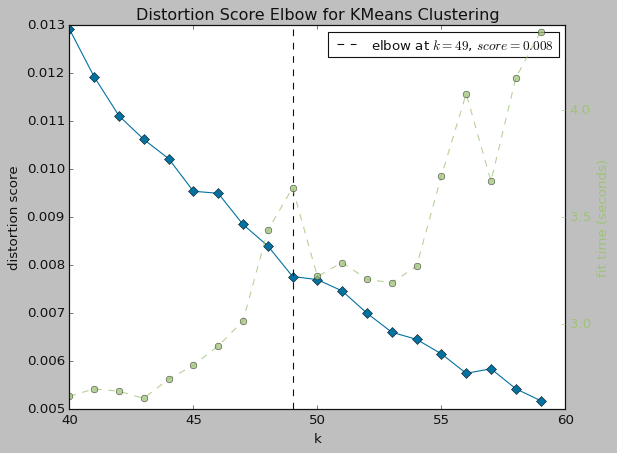

49


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(40,60))

visualizer.fit(train)        # Fit the data to the visualizer
visualizer.show()   
print(visualizer.elbow_value_)
# 7, 0.576 0.5
# 11, 0.173 0.7
# 34, 0.018 2.2
# 48, 0.008 2.8
# 79 , 0.003 5.0
# 101, 0.002 7.1

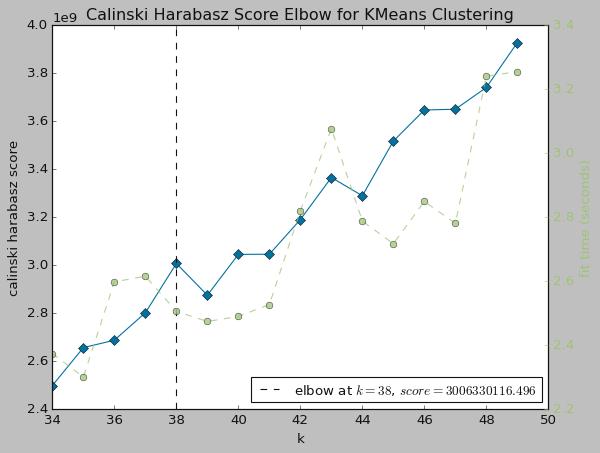

38


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(34,50),metric='calinski_harabasz')

visualizer.fit(train)        # Fit the data to the visualizer
visualizer.show()   
print(visualizer.elbow_value_)
# 61 5100990537 4.1
# 20 1472691090 1.5

In [10]:
model = KMeans()
model.n_clusters = 48

kmeans = model.fit(train)

print(kmeans.labels_)

# print(kmeans.cluster_centers_)








[ 8 36 14 ... 43  8  0]


[19487, 10091, 22269, 34095, 27635, 25033, 4119, 36309, 2776, 15601]
labels: [12 19 14  0 29 14 12  0 29 14]


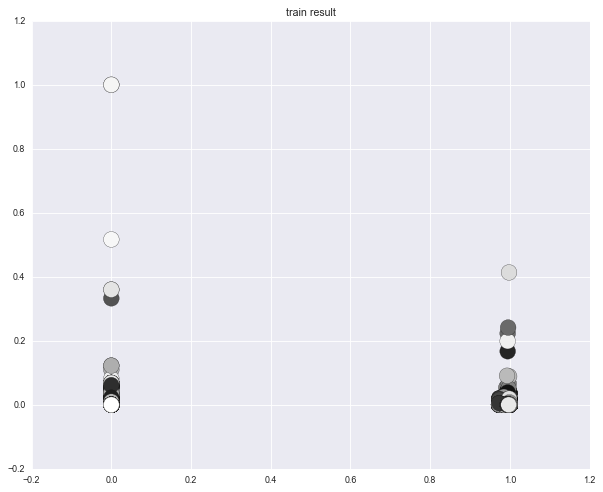

KeyboardInterrupt: 

In [27]:

maxBoundary = len(test)
index = []
test_ls = []
for i in range(10):
    ind = random_int(0,maxBoundary)
    test_ls.append(test[ind])
    index.append(ind)


test_ls = np.asarray(test_ls)
predictions = kmeans.predict(test)

print(index)
print(f"labels: {predictions[index]}")

# print(f"soft cluster scores: {strengths}")

# figure = plt.figure(figsize=(9,7))
# plt.scatter(train[:,0],train[:,1],c=kmeans.labels_, s=200)
# plt.scatter(test[index, 0], test[index, 1], c=predictions,s=100)
# plt.title("Optimal Number of Clusters")
# plt.show()
# plt.savefig('Kmeans-results.png')
# o = metrics.silhouette_score(test, predictions)

# print(f"Silhouette Coefficient: {o}")
figure = plt.figure(figsize=(9,7))
plt.title("train result")
plt.scatter(train[:,0],train[:,1],c=kmeans.labels_, s=200)
plt.show()

print(f"Silhouette Coefficient (train): {metrics.silhouette_score(train, kmeans.labels_):.3f}")
print(f"Silhouette Coefficient (test): {metrics.silhouette_score(test, predictions):.3f}")

# print(f"Silhouette Coefficient: {metrics.silhouette_score(train, kmeans.labels_):.3f}")
# 89 50 70